Is there a correlation between programming experience and programming hobby? Let's explore.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import YearsAndHobby as yh
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')

In [2]:
print("The total number of rows in data set is {}.".format(df.shape[0]))

# Check the column YearsProgram for missing values.
print("The number of rows with invalid YearsProgram is {}."
      .format(sum(df['YearsProgram'].isnull())))

The total number of rows in data set is 51392.
The number of rows with invalid YearsProgram is 247.


In [3]:
# Fill in the missing values.
yp_median = yh.get_median_of_years(
    df[df['YearsProgram'].isnull()==False]['YearsProgram'])
print(yp_median)
years_program_df = df.copy()
years_program_df['YearsProgram'].fillna(yp_median, inplace=True)
print(sum(years_program_df['YearsProgram'].isnull()))

8 to 9 years
0


In [4]:
# Let's take a look at the counts and ratios of people 
# with different programming experiences.
counts_df = yh.gen_counts_df_by_years(
    'YearsProgram', years_program_df)
counts = [
    sum(counts_df['count']),
    sum(counts_df['dev_count']),
    sum(counts_df['not_dev_count'])
]
sums = [
    sum(counts_df['ratio']),
    sum(counts_df['dev_ratio']),
    sum(counts_df['not_dev_ratio'])
]
[counts, sums]

[[50478, 36131, 14347], [1.0000000000000002, 1.0, 1.0]]

In [5]:
counts_df

,years,count,ratio,dev_count,dev_ratio,not_dev_count,not_dev_ratio
Less than a year,0.5,1416,0.028052,395,0.010932,1021,0.071165
1 to 2 years,1.5,2675,0.052993,904,0.025020,1771,0.123440
2 to 3 years,2.5,3178,0.062958,1337,0.037004,1841,0.128320
3 to 4 years,3.5,3607,0.071457,1863,0.051562,1744,0.121559
4 to 5 years,4.5,3791,0.075102,2353,0.065124,1438,0.100230
5 to 6 years,5.5,3496,0.069258,2445,0.067670,1051,0.073256
6 to 7 years,6.5,2817,0.055806,2104,0.058233,713,0.049697
7 to 8 years,7.5,2428,0.048100,1886,0.052199,542,0.037778
8 to 9 years,8.5,2117,0.041939,1637,0.045307,480,0.033456
9 to 10 years,9.5,3152,0.062443,2548,0.070521,604,0.042099


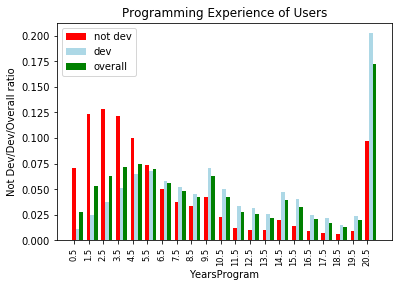

In [6]:
# Let's draw the graph.
x = np.arange(len(counts_df['years']))
width = 0.25

# Draw a bar chart.
plt.bar(x=x, height=counts_df['not_dev_ratio'], width=width, color='red', label=u'not dev')
plt.bar(x=x+width, height=counts_df['dev_ratio'], width=width, color='lightblue', label=u'dev')
plt.bar(x=x+width*2, height=counts_df['ratio'], width=width, color='green', label=u'overall')
plt.xticks(x, counts_df['years'], size='small',rotation=90)
plt.xlabel('YearsProgram')
plt.ylabel('Not Dev/Dev/Overall ratio')
plt.title('Programming Experience of Users')
plt.legend()
plt.show()

Overall, most of the sample users in StackOverflow's programming experience is within 1-8 years. However, many of the programming experience of non-professional developers is within 5 years, and the proportion is very large. For professional developers, most of their programming experience is 2 years to 10, and there are many more people with more experience.

I want to focus on professional developers and want to see the impact of programming hobby on their careers. So, I need to sort out the relevant data.

In [7]:
dev_hobby_ratios_df = yh.gen_hobby_ratios_df_by_years(
    'YearsProgram', years_program_df, only_dev=True)
dev_hobby_ratios_df

,years,hobby_ratio,contrib_ratio
Less than a year,0.5,0.665823,0.389873
1 to 2 years,1.5,0.738938,0.335177
2 to 3 years,2.5,0.737472,0.290202
3 to 4 years,3.5,0.730542,0.321524
4 to 5 years,4.5,0.736932,0.333617
5 to 6 years,5.5,0.730061,0.311247
6 to 7 years,6.5,0.733840,0.314163
7 to 8 years,7.5,0.738070,0.331919
8 to 9 years,8.5,0.745266,0.315211
9 to 10 years,9.5,0.718210,0.332418


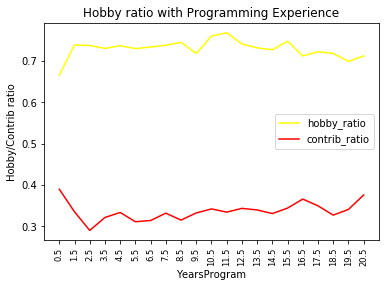

In [8]:
# Let's draw the graph.
x = np.arange(len(counts_df['years']))

# Draw a line chart.
plt.plot(x, dev_hobby_ratios_df['hobby_ratio'], 'yellow')
plt.plot(x, dev_hobby_ratios_df['contrib_ratio'], 'red')
plt.xticks(x, counts_df['years'], size='small',rotation=90)
plt.xlabel('YearsProgram')
plt.ylabel('Hobby/Contrib ratio')
plt.title('Hobby ratio with Programming Experience')
plt.legend()
plt.show()

As we can see, the proportion of professional developers who love programming does not increase with the increase in programming experience. Overall, while the curve on the contribution ratio of open source projects has risen slightly, it doesn't mean anything.

It may not be so appropriate to choose feature YearsProgram here. Let's try again with feature YearsCodedJob.

In [9]:
print("The number of rows with invalid YearsCodedJob is {}."
      .format(sum(df['YearsCodedJob'].isnull())))

The number of rows with invalid YearsCodedJob is 10502.


In [10]:
# Discard rows with missing values.
# Because if we fill in the missing values with the median, 
# it will have a serious impact on the following analysis.
years_coded_job_df = df[df['YearsCodedJob'].isnull()==False]

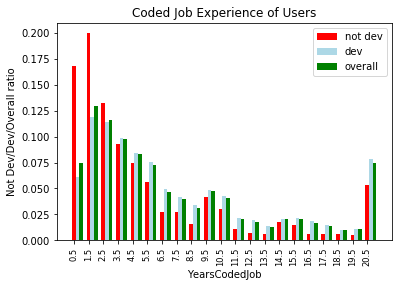

In [11]:
counts_df2 = yh.gen_counts_df_by_years('YearsCodedJob', years_coded_job_df)

x = np.arange(len(counts_df['years']))
width = 0.25

# Draw a bar chart.
plt.bar(x=x, height=counts_df2['not_dev_ratio'], width=width, color='red', label=u'not dev')
plt.bar(x=x+width, height=counts_df2['dev_ratio'], width=width, color='lightblue', label=u'dev')
plt.bar(x=x+width*2, height=counts_df2['ratio'], width=width, color='green', label=u'overall')
plt.xticks(x, counts_df2['years'], size='small',rotation=90)
plt.xlabel('YearsCodedJob')
plt.ylabel('Not Dev/Dev/Overall ratio')
plt.title('Coded Job Experience of Users')
plt.legend()
plt.show()

Obviously, from this point of view, most sample users have less experience in coded job.

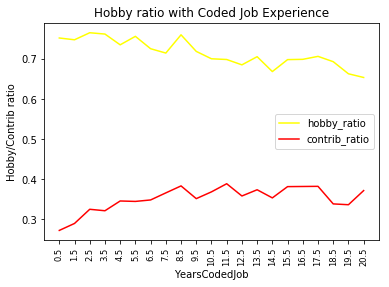

In [12]:
dev_hobby_ratios_df2 = yh.gen_hobby_ratios_df_by_years(
    'YearsCodedJob', years_coded_job_df, only_dev=True)

x = np.arange(len(counts_df['years']))

# 绘制折线图。
# Draw a line chart.
plt.plot(x, dev_hobby_ratios_df2['hobby_ratio'], 'yellow')
plt.plot(x, dev_hobby_ratios_df2['contrib_ratio'], 'red')
plt.xticks(x, counts_df['years'], size='small',rotation=90)
plt.xlabel('YearsCodedJob')
plt.ylabel('Hobby/Contrib ratio')
plt.title('Hobby ratio with Coded Job Experience')
plt.legend()
plt.show()

I'm a little surprised that among professional developers with more experience in coded job, the proportion of people who love programming is smaller.
Well, maybe it's because the heavy work has worn away their enthusiasm.
Professional developers who seem to have more experience in coded job are more willing to contribute to open source projects. 
However, this trend is still less pronounced, especially among people with more than 10 years of coded job experience.
At this point, we can come to the conclusion that the love of programming by professional developers has nothing to do with the amount of programming experience they have and the number of years they work in programming. At this point, we can come to the conclusion that the love of programming by professional developers has little to do with the amount of programming experience they have and the number of years they work in programming. In turn, love programming will allow professional developers to stay in programming jobs longer? At least from the above analysis, this is not the case.